In [8]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from PIL import Image
import glob
import os

In [11]:
img_path_cat = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat2.jpg'  
img_cat_orig = cv2.imread(img_path_cat)

print(img_cat_orig.shape)

(3024, 4032, 3)


In [12]:
img_path_bg = os.getenv('HOME')+'/aiffel/human_segmentation/images/sigol.jpg'  
img_bg_orig = cv2.imread(img_path_bg)

print(img_bg_orig.shape)

(4000, 2252, 3)


In [20]:
resized_img_cat = cv2.resize(img_cat_orig, dsize=(3000,2000), interpolation=cv2.INTER_LINEAR)
cv2.imwrite('resized_img_cat.jpg', resized_img_cat)

True

In [21]:
resized_img_bg = cv2.resize(img_bg_orig, dsize=(3000,2000), interpolation=cv2.INTER_LINEAR)
cv2.imwrite('resized_img_bg.jpg', resized_img_bg)

True

<function matplotlib.pyplot.show(close=None, block=None)>

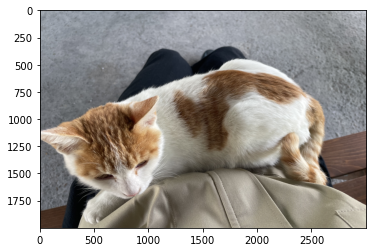

In [14]:
plt.imshow(cv2.cvtColor(resized_img_cat, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

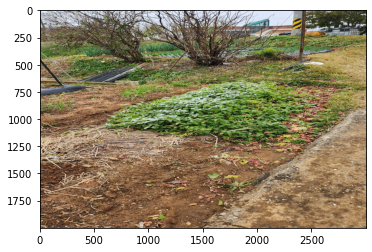

In [15]:
plt.imshow(cv2.cvtColor(resized_img_bg, cv2.COLOR_BGR2RGB))
plt.show

In [16]:
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

In [17]:
model = semantic_segmentation()

In [18]:
model.load_pascalvoc_model(model_file)

In [22]:
resized_img_cat_path = os.getenv('HOME')+'/aiffel/resized_img_cat.jpg'
resized_img_bg_path = os.getenv('HOME')+'/aiffel/resized_img_bg.jpg'

In [23]:
segvalues, output = model.segmentAsPascalvoc(resized_img_cat_path)

In [24]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

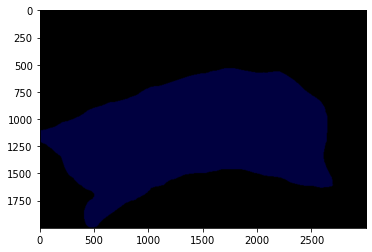

In [25]:
plt.imshow(output)
plt.show()

In [26]:
segvalues

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [27]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [29]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [30]:
colormap[8]

array([64,  0,  0])

In [31]:
seg_color = (0,0,64)

(2000, 3000)


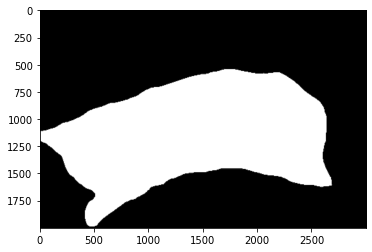

In [32]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

In [34]:
img_mask = seg_map.astype(np.uint8) * 255

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_concat = np.where(img_mask_color==255, resized_img_cat, resized_img_bg)

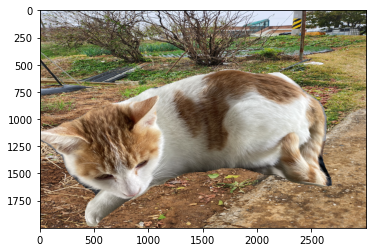

In [35]:
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()